In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_data_x = pd.read_csv("../archive/exoTrain.csv").iloc[:, 1:]
with open("../archive/ProcessData.npy", 'rb') as f:
        train_x = np.load(f)
        test_x = np.load(f)
        train_y = np.load(f)
        test_y = np.load(f)
train_x_df = pd.DataFrame(train_x, columns=training_data_x.columns)
#https://stackoverflow.com/questions/50087135/convert-dataframe-from-wide-to-long-pandas
#thttps://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html#pandas.wide_to_long
print(train_x_df)
train_x_df["id"] = train_x_df.index
train_x_df = pd.wide_to_long(train_x_df, ["FLUX"], i="id", j="time", sep='.').reset_index().sort_values(['id','time'])
print(train_x_df.head())

         FLUX.1    FLUX.2    FLUX.3    FLUX.4    FLUX.5    FLUX.6    FLUX.7  \
0     -1.470182 -1.265015 -0.292911  0.380301  0.540297  1.652947  1.741382   
1      0.591357  0.530126  0.945562  0.667802  1.363121  1.291878  1.586202   
2      1.030808  1.040210  1.000268  0.970761  0.894847  0.916974  0.917612   
3      1.087530  1.157041  1.007028  0.992972  1.061646  1.048133  1.083863   
4      1.109711  1.128772  1.149154  1.138471  1.112945  1.102053  1.076637   
...         ...       ...       ...       ...       ...       ...       ...   
10095  0.608466  0.544356  0.361798  0.648296  0.856675  0.958137  1.545675   
10096  0.475201  0.673140  0.555877  0.620556  0.859805  0.936143  0.917023   
10097  1.835736  1.975613  2.069143  1.545040  0.912002  0.630742  0.491073   
10098 -1.563608 -1.826664 -1.689507 -1.015106 -0.793090 -0.588308 -0.029728   
10099  0.975735  0.969785  0.996562  0.982792  0.977335  0.971039  1.000937   

         FLUX.8    FLUX.9   FLUX.10  ...  FLUX.3188

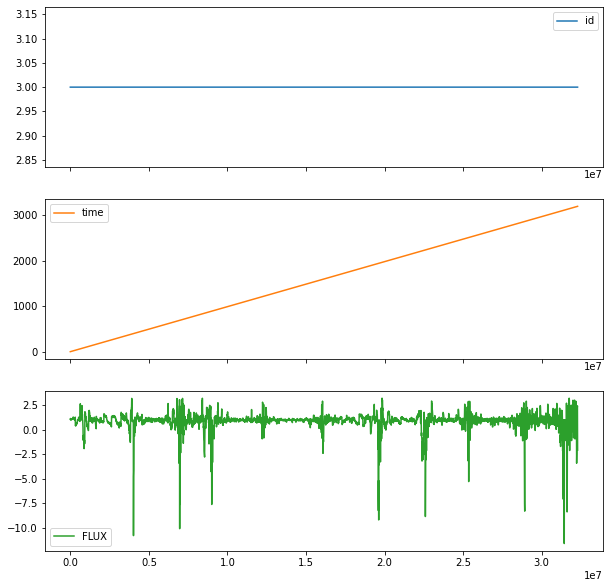

In [3]:
train_x_df[train_x_df['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [4]:
from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters

#13min for exotest
extracted_features = extract_features(train_x_df, column_id= "id", column_sort= "time", 
                                      column_value= "FLUX", default_fc_parameters= EfficientFCParameters())

Feature Extraction:  20%|██        | 4/20 [23:03<1:32:15, 345.99s/it]
Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process ForkPoolWorker-2:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/tsfresh/ut

KeyboardInterrupt: 

In [ ]:
extracted_features

In [ ]:
extracted_features.to_pickle("./TS-Train.pkl")

In [ ]:
testing_data_x = pd.read_csv("../archive/exoTest.csv").iloc[:, 1:]
test_x_df = pd.DataFrame(test_x, columns=testing_data_x.columns)

test_x_df["id"] = test_x_df.index
test_x_df = pd.wide_to_long(test_x_df, ["FLUX"], i="id", j="time", sep='.').reset_index().sort_values(['id','time'])
print(test_x_df.head())

In [ ]:
extracted_features = extract_features(test_x_df, column_id= "id", column_sort= "time", 
                                      column_value= "FLUX", default_fc_parameters= EfficientFCParameters())

In [ ]:
extracted_features

In [ ]:
extracted_features.to_pickle("./TS-Test.pkl")